In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import *
from gbm import *

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
last_id = 287
backtest_start = 187
backtest_end = 197

prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _, discounts = MultivariateGBMSimulationTS(s0=close.iloc[current_id], n_paths=1000, current_id=current_id, window_size=30)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=discounts, risk_neutral=False, verbose=False))
    
    prices.append(np.mean(payoff))



In [5]:
prices

[1047.1869944882326,
 952.0940233092174,
 1018.2652490501075,
 997.1776635318315,
 1027.043211960867,
 1069.1214397564331,
 1226.2355013509728,
 1191.6373650187622,
 1095.5998012217428,
 1148.8295338515559]

In [ ]:
last_id = 287
backtest_start = 187
backtest_end = 197

prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _ = MultivariateGBMSimulationEMS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=0.01107, risk_neutral=True, verbose=False))
    
    prices.append(np.mean(payoff))



100%|██████████| 1/1 [00:40<00:00, 40.30s/it]


In [10]:
prices

[1029.7445604063892]

d:\mh4518_simulation_in_fin\notebooks\../utils\utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  real_price['Date'] = pd.to_datetime(real_price['Date'], dayfirst=True)


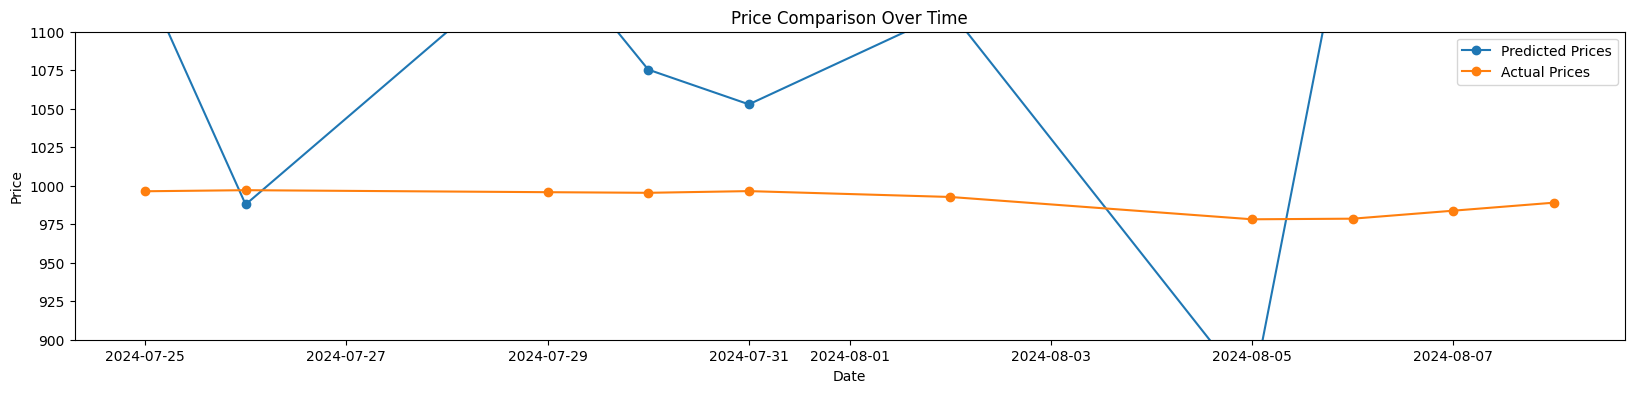

In [4]:
last_id = 287
backtest_start = 187
backtest_end = 197
combined_df = retrieve_data()

evaluation_plot(
    backtest_start,
    backtest_end,
    combined_df,
    prices
    )